In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_text

1. Провести разведочный анализ на загруженных данных. Здесь и далее задания
выполняются на массиве транзакций по кредитным картам.
- 1.1. Определить число строк и столбцов и их типы данных
- 1.2. Визуализировать распределения данных по каждому столбцу (матрица распределений. Для каждого столбца выбрать свою визуализацию)
- 1.3. Визуализировать данные в двухмерном пространстве, проведя предварительно
анализ главных компонент


In [2]:
val = open('data/creditcard.csv')

In [ ]:
data = pd.read_csv(val)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

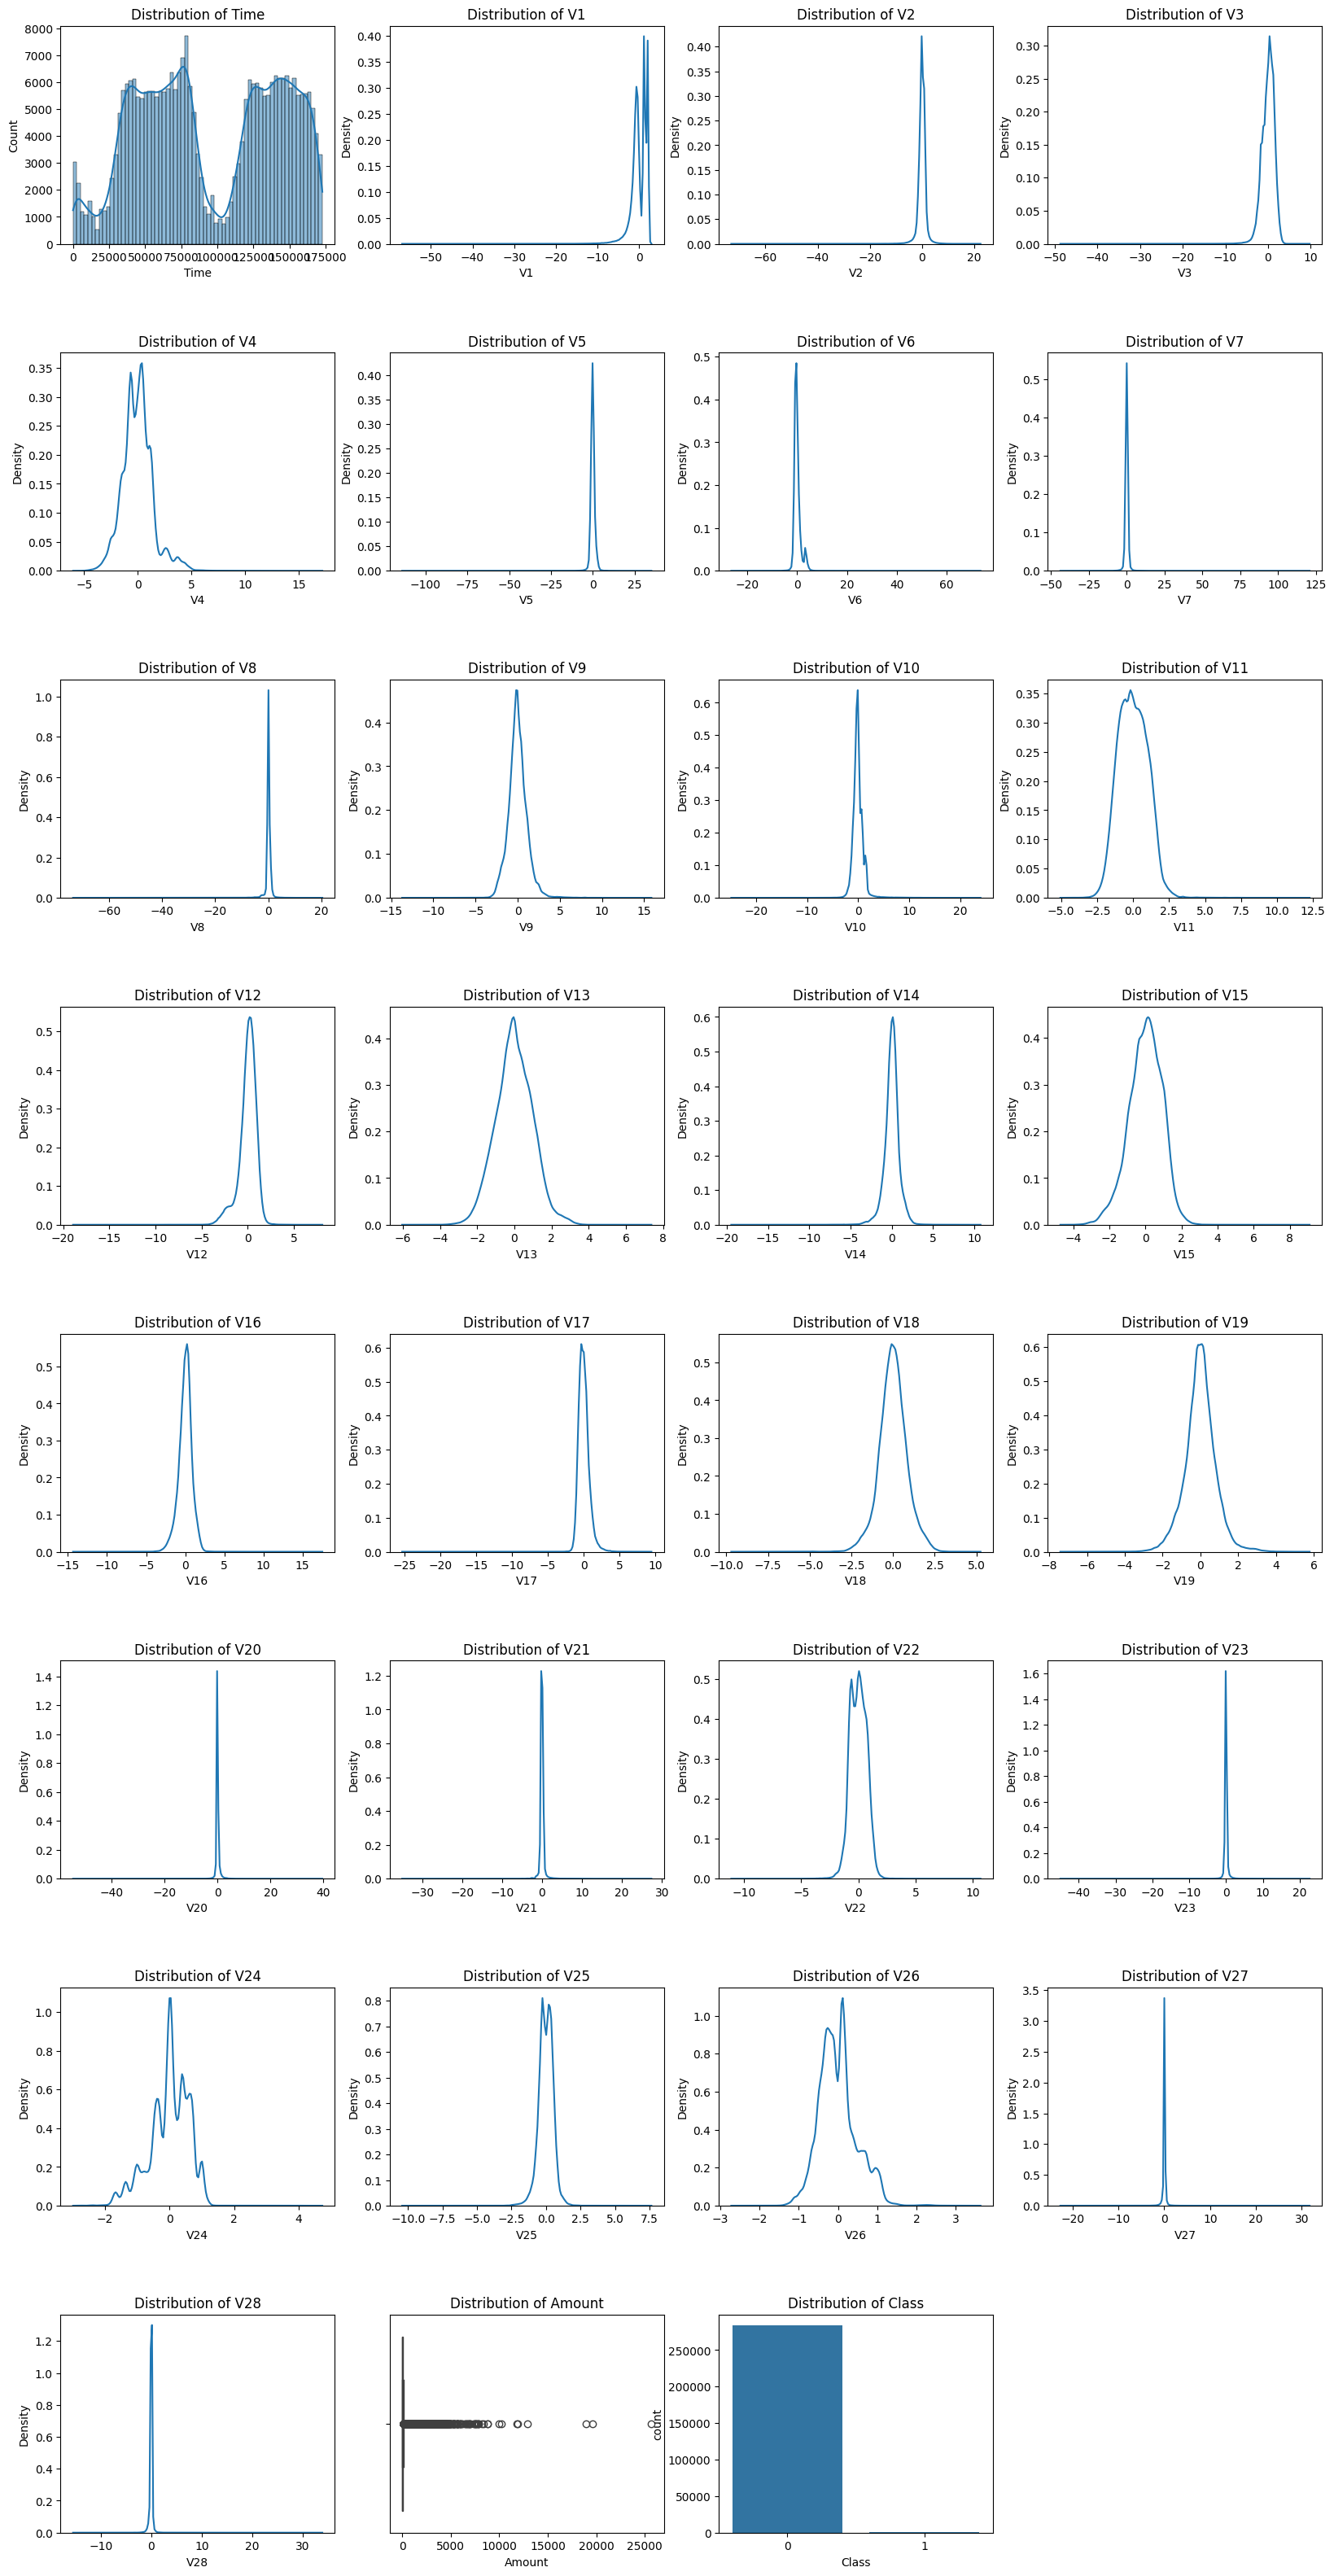

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 40))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()
#
for i, column in enumerate(data.columns):
    if i >= len(axes):
        print(f"Skipping {column} as there are more columns than subplots.")
        break
    ax = axes[i]
    if column == "Class":
        sns.countplot(data=data, x=column, ax=ax)
    elif column == "Amount":
        sns.boxplot(data=data, x=column, ax=ax)
    elif column == "Time":
        sns.histplot(data[column], kde=True, ax=ax)
    else:
        sns.kdeplot(data[column], ax=ax)
    ax.set_title(f"Distribution of {column}")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=["Class"]))

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [ ]:
pca_df = pd.DataFrame(
    data=principal_components,
    columns=["PCA1", "PCA2"],
)
pca_df["Class"] = data["Class"].values

In [ ]:
pca_df

,PCA1,PCA2,Class
0,0.416630,-2.532664,0
1,-0.393453,-2.077326,0
2,1.868525,-2.533497,0
3,0.315744,-1.783506,0
4,-0.004379,-1.488415,0
...,...,...,...
284802,-1.493200,1.900149,0
284803,-0.366836,0.842366,0
284804,-0.194063,2.070788,0
284805,-0.466089,1.225394,0


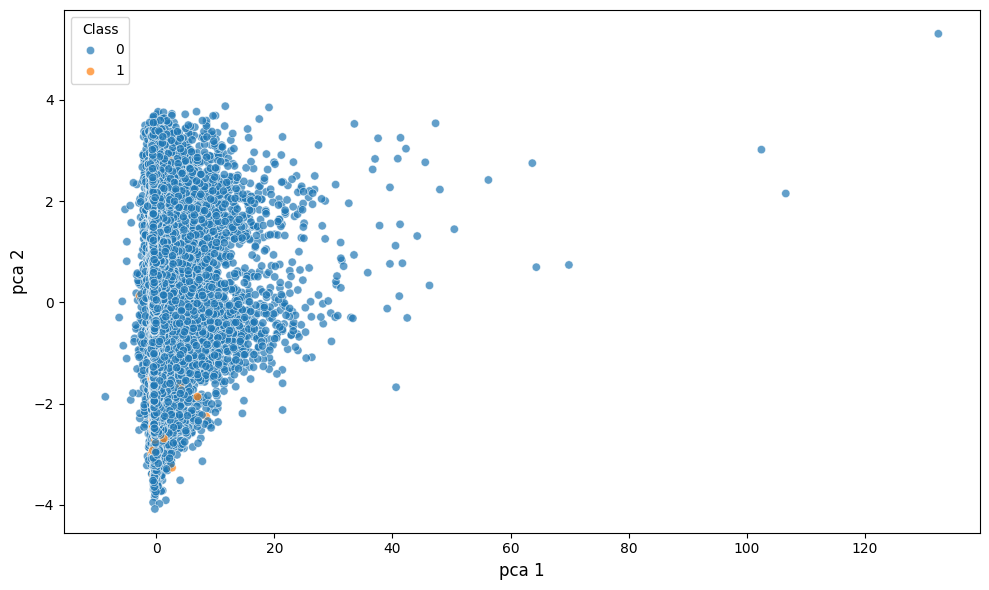

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Class",
    data=pca_df,
    alpha=0.7,
)

plt.xlabel("pca 1", fontsize=12)
plt.ylabel("pca 2", fontsize=12)
plt.tight_layout()

2. Провести поиск выбросов (аномалий) на загруженных данных
- a. Использовать Isolation Forest

- b. Использовать DBSCAN

- c. Использовать LOF

- d. Сравнить результаты

In [ ]:
iso_forest = IsolationForest(contamination=0.2, random_state=16)
dbscan = DBSCAN(eps=1, min_samples=5)
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.2)

In [ ]:
data["IsoForest_Anomaly"] = iso_forest.fit_predict(scaled_data)
data["DBSCAN_Anomaly"] = dbscan.fit_predict(scaled_data)
data["LOF_Anomaly"] = lof.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [ ]:
print(f'ISO froest= {len(data["IsoForest_Anomaly"][data["IsoForest_Anomaly"] == -1])}')
print(f'DBSCAN = {len(data["DBSCAN_Anomaly"][data["DBSCAN_Anomaly"] == -1])}')
print(f'LOF = {len(data["LOF_Anomaly"][data["LOF_Anomaly"] == -1])}')

ISO froest= 56962
DBSCAN = 153997
LOF = 56962


3. Использовать для поиска аномалий предварительную факторизацию с помощью PCA и
методами из п.2.

In [ ]:
pca = PCA(n_components=10)
pca_values = pca.fit_transform(scaled_data)

In [ ]:
pca_df["IsoForest_Anomaly_PCA"] = iso_forest.fit_predict(pca_values)
pca_df["DBSCAN_Anomaly_PCA"] = dbscan.fit_predict(pca_values)
pca_df["LOF_Anomaly_PCA"] = lof.fit_predict(pca_values)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [ ]:
print(f"isolation Forest PCA: {len(pca_df['IsoForest_Anomaly_PCA'][pca_df['IsoForest_Anomaly_PCA'] == -1])}")
print(f"DBSKAN: {len(pca_df['DBSCAN_Anomaly_PCA'][pca_df['DBSCAN_Anomaly_PCA'] == -1])}")
print(f"lof: {len(pca_df['LOF_Anomaly_PCA'][pca_df['LOF_Anomaly_PCA'] == -1])}")

isolation Forest PCA: 56962
DBSKAN: 32678
lof: 56962


4. Интерпретировать аномалии выделенные из п.2-п.3. Определить какие аномалии
совпадают со фродовыми транзакциями.

In [ ]:
def print_confusion_matrix(method_name, true_labels, predicted_labels):
    print(f"{method_name}:")
    print(confusion_matrix(true_labels, predicted_labels))
    print()


In [ ]:
true_labels = data["Class"]

iso_forest_predictions = [1 if x == 1 else 0 for x in data["IsoForest_Anomaly"]]
print_confusion_matrix("IsoForest", true_labels, iso_forest_predictions)

dbscan_predictions = [1 if x != -1 else 0 for x in data["DBSCAN_Anomaly"]]
print_confusion_matrix("dbskan", true_labels, dbscan_predictions)

lof_predictions = [1 if x == 1 else 0 for x in data["LOF_Anomaly"]]
print_confusion_matrix("lof", true_labels, lof_predictions)

iso_forest_pca_predictions = [1 if x == 1 else 0 for x in pca_df["IsoForest_Anomaly_PCA"]]
print_confusion_matrix("IsoForest + PCA", true_labels, iso_forest_pca_predictions)

dbscan_pca_predictions = [1 if x != -1 else 0 for x in pca_df["DBSCAN_Anomaly_PCA"]]
print_confusion_matrix("dbskan + pca", true_labels, dbscan_pca_predictions)

lof_pca_predictions = [1 if x == 1 else 0 for x in pca_df["LOF_Anomaly_PCA"]]
print_confusion_matrix("lof + pca", true_labels, lof_pca_predictions)


IsoForest:
[[ 56507 227808]
 [   455     37]]

dbskan:
[[153517 130798]
 [   480     12]]

lof:
[[ 56849 227466]
 [   113    379]]

IsoForest + PCA:
[[ 56519 227796]
 [   443     49]]

dbskan + pca:
[[ 32273 252042]
 [   405     87]]

lof + pca:
[[ 56843 227472]
 [   119    373]]



5. Выделить решающие правила, позволяющие выделить фрод на датасете

In [ ]:
X = data.drop(columns=["Class", "IsoForest_Anomaly", "DBSCAN_Anomaly", "LOF_Anomaly"])
y = data["Class"]

In [ ]:
model = DecisionTreeClassifier()
model.fit(X, y)

rules = export_text(model, feature_names=list(X.columns))
print(rules)

|--- V17 <= -2.75
|   |--- V12 <= -2.18
|   |   |--- V14 <= -3.43
|   |   |   |--- V26 <= -0.26
|   |   |   |   |--- V27 <= 1.08
|   |   |   |   |   |--- V5 <= -0.01
|   |   |   |   |   |   |--- V19 <= 2.54
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- V19 >  2.54
|   |   |   |   |   |   |   |--- V4 <= 4.34
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- V4 >  4.34
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- V5 >  -0.01
|   |   |   |   |   |   |--- V22 <= 0.47
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- V22 >  0.47
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- V27 >  1.08
|   |   |   |   |   |--- V6 <= -4.02
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- V6 >  -4.02
|   |   |   |   |   |   |--- V28 <= 0.27
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- V28 >  0.27
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |---